In [12]:

import numpy
# библиотека scipy.special содержит сигмоиду expit()
import scipy.special
# библиотека для графического отображения массивов
import matplotlib.pyplot
# гарантировать размещение графики в данном блокноте,
# а не в отдельном окне
%matplotlib inline

# определение класса нейронной сети
class neuralNetwork:
    # инициализировать нейронную сеть
    def __init__(self, inputnodes, hiddennodes, outputnodes,learningrate):# задать количество узлов во входном, скрытом и выходном слое
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
    # коэффициент обучения
        self.lr = learningrate

        # Матрицы весовых коэффициентов связей, wih и who.
        # Весовые коэффициенты связей между узлом i и узлом j
        # следующего слоя обозначены как w_i_j:
        # wll w21
        # wl2 w22 и т.д.

        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5),(self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5),(self.onodes, self.hnodes))
        # использование сигмоиды в качестве функции активации


        self.activation_function = lambda x: scipy.special.expit(x)

        pass
# тренировка нейронной сети
    def train (self, inputs_list, targets_list) :
        # преобразование списка входных значений в двухмерный массив
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T




        # рассчитать входящие сигналы для скрытого слоя
        hidden_inputs = numpy .dot (self .wih, inputs)
        # рассчитать исходящие сигналы для скрытого слоя
        hidden_outputs = self.activation_function(hidden_inputs)

        # рассчитать входящие сигналы для выходного слоя
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # рассчитать исходящие сигналы для выходного слоя
        final_outputs = self.activation_function(final_inputs)

        # ошибки выходного слоя =(целевое значение - фактическое значение)
        output_errors = targets - final_outputs
        # ошибки скрытого слоя - это ошибки output_errors,
        # распределенные пропорционально весовым коэффициентам связей
        # и рекомбинированные на скрытых узлах
        hidden_errors = numpy.dot(self.who.T, output_errors)

        # обновить весовые коэффициенты для связей между входным и скрытым слоями
        self.wih += self.lr * numpy.dot((hidden_errors *hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        pass
    # опрос нейронной сети
    def query(self, inputs_list):
        # преобразовать список входных значений в двухмерный массив
        inputs = numpy.array(inputs_list, ndmin=2).T
        # рассчитать входящие сигналы для скрытого слоя
        hidden_inputs = numpy.dot(self.wih, inputs)

        # рассчитать исходящие сигналы для скрытого слоя
        hidden_outputs = self.activation_function(hidden_inputs)
        # рассчитать входящие сигналы для выходного слоя
        final_inputs = numpy.dot (self .who, hidden_outputs)
        # рассчитать исходящие сигналы для выходного слоя
        final_outputs = self.activation_function(final_inputs)
        return final_outputs




# количество входных, скрытых и выходных узлов
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
# коэффициент обучения равен 0,3
learning_rate =0.3
# создать экземпляр нейронной сети
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

# загрузить в список тестовый набор данных CSV-файла набора MNIST
training_data_file = open("mnist_train_100.csv", "r")
training_data_list = training_data_file.readlines ()
training_data_file.close()


# тренировка нейронной сети
# перебрать все записи в тренировочном наборе данных
for record in training_data_list:
    # получить список значений, используя символы запятой (1,1)
    # в качестве разделителей
    all_values = record.split(',')
    # масштабировать и сместить входные значения
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # создать целевые выходные значения (все равны 0,01, за исключением
    # желаемого маркерного значения, равного 0,99)
    targets = numpy.zeros(output_nodes) + 0.01

    # all_values[0] - целевое маркерное значение для данной записи
    targets[int(all_values[0])] =0.99
    n.train(inputs, targets)
    pass







In [13]:
# загрузить в список тестовый набор данных CSV-файла набора MNIST
test_data_file = open("mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.closed

all_values=test_data_list[0].split(',')
print(all_values[0])


7


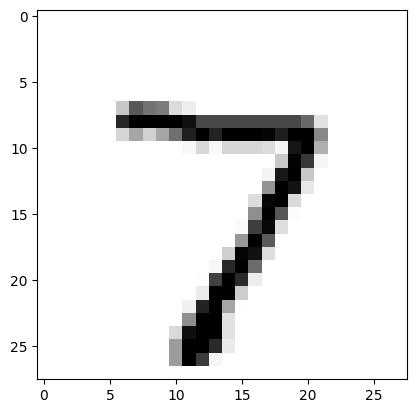

In [14]:
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys',interpolation='None')

192

In [15]:
n.query((numpy.asfarray(all_values[1:])/ 255.0 * 0.99)+0.01)

array([[0.09341304],
       [0.02208201],
       [0.06907324],
       [0.06096277],
       [0.05638246],
       [0.08148707],
       [0.01101046],
       [0.78435268],
       [0.04613227],
       [0.04951888]])

In [16]:
# тестирование нейронной сети
# журнал оценок работы сети, первоначально пустой
scorecard = []
# перебрать все записи в тестовом наборе данных
for record in test_data_list:
    # получить список значений из записи, используя символы
    # запятой (*,1) в качестве разделителей
    all_values = record.split(',')
    # правильный ответ - первое значение
    correct_label = int(all_values[0])
    print(correct_label, "истинный маркер")
     # масштабировать и сместить входные значения
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # опрос сети
    outputs = n.query(inputs)
    # индекс наибольшего значения является маркерным значением
    label = numpy.argmax(outputs)
    print(label, "ответ сети")
    # присоединить оценку ответа сети к концу списка
    if (label == correct_label) :
        # в случае правильного ответа сети присоединить
        # к списку значение 1
        scorecard.append(1)
    else:
     # в случае неправильного ответа сети присоединить
    # к списку значение 0
     scorecard.append(0)
     pass
pass


print(scorecard)

7 истинный маркер
7 ответ сети
2 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
0 истинный маркер
0 ответ сети
4 истинный маркер
4 ответ сети
1 истинный маркер
1 ответ сети
4 истинный маркер
4 ответ сети
9 истинный маркер
3 ответ сети
5 истинный маркер
4 ответ сети
9 истинный маркер
7 ответ сети
[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]


In [17]:
# рассчитать показатель эффективности в виде
# доли правильных ответов
scorecard_array = numpy.asarray(scorecard)
print ("эффективность = ", scorecard_array.sum() /scorecard_array.size)


эффективность =  0.6


код с биг дата

In [18]:
import numpy
# библиотека scipy.special содержит сигмоиду expit()
import scipy.special
# библиотека для графического отображения массивов
import matplotlib.pyplot
# гарантировать размещение графики в данном блокноте,
# а не в отдельном окне
%matplotlib inline

# определение класса нейронной сети
class neuralNetwork:
    # инициализировать нейронную сеть
    def __init__(self, inputnodes, hiddennodes, outputnodes,learningrate):# задать количество узлов во входном, скрытом и выходном слое
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
    # коэффициент обучения
        self.lr = learningrate

        # Матрицы весовых коэффициентов связей, wih и who.
        # Весовые коэффициенты связей между узлом i и узлом j
        # следующего слоя обозначены как w_i_j:
        # wll w21
        # wl2 w22 и т.д.

        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5),(self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5),(self.onodes, self.hnodes))
        # использование сигмоиды в качестве функции активации


        self.activation_function = lambda x: scipy.special.expit(x)

        pass
# тренировка нейронной сети
    def train (self, inputs_list, targets_list) :
        # преобразование списка входных значений в двухмерный массив
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T




        # рассчитать входящие сигналы для скрытого слоя
        hidden_inputs = numpy .dot (self .wih, inputs)
        # рассчитать исходящие сигналы для скрытого слоя
        hidden_outputs = self.activation_function(hidden_inputs)

        # рассчитать входящие сигналы для выходного слоя
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # рассчитать исходящие сигналы для выходного слоя
        final_outputs = self.activation_function(final_inputs)

        # ошибки выходного слоя =(целевое значение - фактическое значение)
        output_errors = targets - final_outputs
        # ошибки скрытого слоя - это ошибки output_errors,
        # распределенные пропорционально весовым коэффициентам связей
        # и рекомбинированные на скрытых узлах
        hidden_errors = numpy.dot(self.who.T, output_errors)

        # обновить весовые коэффициенты для связей между входным и скрытым слоями
        self.wih += self.lr * numpy.dot((hidden_errors *hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        pass
    # опрос нейронной сети
    def query(self, inputs_list):
        # преобразовать список входных значений в двухмерный массив
        inputs = numpy.array(inputs_list, ndmin=2).T
        # рассчитать входящие сигналы для скрытого слоя
        hidden_inputs = numpy.dot(self.wih, inputs)

        # рассчитать исходящие сигналы для скрытого слоя
        hidden_outputs = self.activation_function(hidden_inputs)
        # рассчитать входящие сигналы для выходного слоя
        final_inputs = numpy.dot (self .who, hidden_outputs)
        # рассчитать исходящие сигналы для выходного слоя
        final_outputs = self.activation_function(final_inputs)
        return final_outputs




# количество входных, скрытых и выходных узлов
input_nodes = 784
hidden_nodes = 200
output_nodes = 10
# коэффициент обучения равен 0,3
learning_rate =0.2
# создать экземпляр нейронной сети
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

# загрузить в список тестовый набор данных CSV-файла набора MNIST
training_data_file = open("mnist_train.csv", "r")
training_data_list = training_data_file.readlines ()
training_data_file.close()


# тренировка нейронной сети
# перебрать все записи в тренировочном наборе данных
for record in training_data_list:
    # получить список значений, используя символы запятой (1,1)
    # в качестве разделителей
    all_values = record.split(',')
    # масштабировать и сместить входные значения
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # создать целевые выходные значения (все равны 0,01, за исключением
    # желаемого маркерного значения, равного 0,99)
    targets = numpy.zeros(output_nodes) + 0.01

    # all_values[0] - целевое маркерное значение для данной записи
    targets[int(all_values[0])] =0.99
    n.train(inputs, targets)
    pass










In [19]:
# загрузить в список тестовый набор данных CSV-файла набора MNIST
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.closed

all_values=test_data_list[0].split(',')
print(all_values[0])



n.query((numpy.asfarray(all_values[1:])/ 255.0 * 0.99)+0.01)


# тестирование нейронной сети
# журнал оценок работы сети, первоначально пустой
scorecard = []
# перебрать все записи в тестовом наборе данных
for record in test_data_list:
    # получить список значений из записи, используя символы
    # запятой (*,1) в качестве разделителей
    all_values = record.split(',')
    # правильный ответ - первое значение
    correct_label = int(all_values[0])
    print(correct_label, "ровный пацан (истинный маркер)")
     # масштабировать и сместить входные значения
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # опрос сети
    outputs = n.query(inputs)
    # индекс наибольшего значения является маркерным значением
    label = numpy.argmax(outputs)
    print(label, "Стрелка(ответ сети)")
    # присоединить оценку ответа сети к концу списка
    if (label == correct_label) :
        # в случае правильного ответа сети присоединить
        # к списку значение 1
        scorecard.append(1)
    else:
     # в случае неправильного ответа сети присоединить
    # к списку значение 0
     scorecard.append(0)
     pass
pass



# рассчитать показатель эффективности в виде
# доли правильных ответов
scorecard_array = numpy.asarray(scorecard)
print ("эффективность(пацаны против чушпанов) = ", scorecard_array.sum() /scorecard_array.size)


7
7 ровный пацан (истинный маркер)
7 Стрелка(ответ сети)
2 ровный пацан (истинный маркер)
2 Стрелка(ответ сети)
1 ровный пацан (истинный маркер)
1 Стрелка(ответ сети)
0 ровный пацан (истинный маркер)
0 Стрелка(ответ сети)
4 ровный пацан (истинный маркер)
4 Стрелка(ответ сети)
1 ровный пацан (истинный маркер)
1 Стрелка(ответ сети)
4 ровный пацан (истинный маркер)
4 Стрелка(ответ сети)
9 ровный пацан (истинный маркер)
9 Стрелка(ответ сети)
5 ровный пацан (истинный маркер)
5 Стрелка(ответ сети)
9 ровный пацан (истинный маркер)
9 Стрелка(ответ сети)
0 ровный пацан (истинный маркер)
0 Стрелка(ответ сети)
6 ровный пацан (истинный маркер)
6 Стрелка(ответ сети)
9 ровный пацан (истинный маркер)
9 Стрелка(ответ сети)
0 ровный пацан (истинный маркер)
0 Стрелка(ответ сети)
1 ровный пацан (истинный маркер)
1 Стрелка(ответ сети)
5 ровный пацан (истинный маркер)
5 Стрелка(ответ сети)
9 ровный пацан (истинный маркер)
9 Стрелка(ответ сети)
7 ровный пацан (истинный маркер)
7 Стрелка(ответ сети)
3 ровный

нейросеть наоборот

AttributeError: scipy.misc is deprecated and has no attribute imread.

dsit [hgym rfrfzbj]

216

loading ...  3svo.png
0.01
1.0
[3.   0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 1.
 1.   1.   1.   1.   1.   0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 1.   1.   1.
 1.   1.   1.   1.   1.   0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 1.   1.   1.   1.
 0.01 0.01 0.01 1.   1.   0.01 0.01 0.01 0.01 0.01 0

NameError: name 'n' is not defined

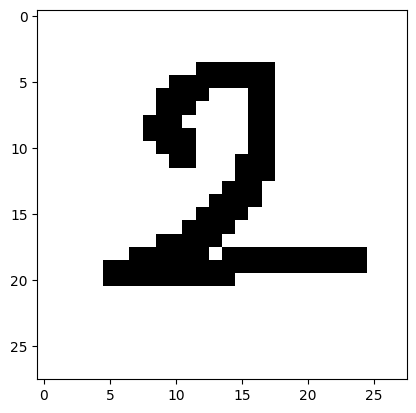